In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import gradio as gr
from PIL import Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/ColabNotebooks/E-Wastedataset.zip

Archive:  /content/drive/MyDrive/ColabNotebooks/E-Wastedataset.zip
  inflating: modified-dataset/test/Battery/battery_106.jpg  
  inflating: modified-dataset/test/Battery/battery_128.jpg  
  inflating: modified-dataset/test/Battery/battery_148.jpg  
  inflating: modified-dataset/test/Battery/battery_152.jpg  
  inflating: modified-dataset/test/Battery/battery_174.jpg  
  inflating: modified-dataset/test/Battery/battery_177.jpg  
  inflating: modified-dataset/test/Battery/battery_190.jpg  
  inflating: modified-dataset/test/Battery/battery_192.jpg  
  inflating: modified-dataset/test/Battery/battery_211.jpg  
  inflating: modified-dataset/test/Battery/battery_22.jpg  
  inflating: modified-dataset/test/Battery/battery_24.jpg  
  inflating: modified-dataset/test/Battery/battery_241.jpg  
  inflating: modified-dataset/test/Battery/battery_242.jpg  
  inflating: modified-dataset/test/Battery/battery_251.jpg  
  inflating: modified-dataset/test/Battery/battery_259.jpg  
  inflating: modifie

In [6]:
testpath = r'/content/modified-dataset/test'
trainpath = r'/content/modified-dataset/train'
validpath = r'/content/modified-dataset/val'

In [7]:
datatrain= tf.keras.utils.image_dataset_from_directory(trainpath,shuffle = True, image_size = (128,128), batch_size = 32, validation_split= False)

Found 2400 files belonging to 10 classes.


In [8]:
datatest=tf.keras.utils.image_dataset_from_directory(testpath,shuffle = False, image_size = (128,128), batch_size = 32, validation_split= False)

Found 300 files belonging to 10 classes.


In [9]:
datavalid = tf.keras.utils.image_dataset_from_directory(validpath,shuffle = True, image_size = (128,128), batch_size = 32, validation_split= False)

Found 300 files belonging to 10 classes.


In [10]:
print(len(datatrain.class_names))
class_names = datatrain.class_names
print(class_names)

10
['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


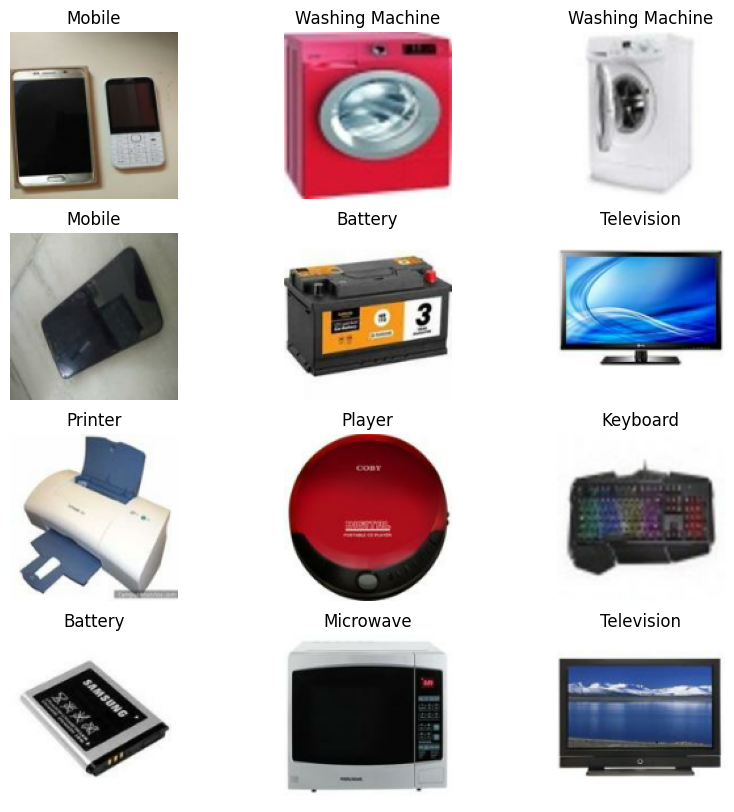

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in datatrain.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")